# Goal: 
Perform descriptive statistics and initial analysis on the simple box score dataset

Import libraries to connect to our postgres database and do dataframe manipulation

In [15]:
import pandas as pd
import numpy as np
import getpass
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from psycopg2.extensions import adapt, register_adapter, AsIs
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

Grab password from user input and create database connection

In [2]:
mypasswd = getpass.getpass()
conn = psycopg2.connect(database = 'cs20_group4',
                              user = 'fhfrf',#replace with pawprint
                              host = 'pgsql.dsa.lan',
                              password = mypasswd)

········


Read in the SQL query results and assign to the nba_simple_box dataframe. Then let's look at the first five rows.

In [3]:
nba_simple_box = pd.read_sql_query("""
SELECT
    *
FROM nba_simple_boxscores
""", con = conn)
nba_simple_box.head()

,boxscore,away_name,away_abbr,away_score,home_name,home_abbr,home_score,winning_name,winning_abbr,losing_name,losing_abbr,season
0,201810160BOS,Philadelphia,PHI,87.0,Boston,BOS,105.0,Boston,BOS,Philadelphia,PHI,2019.0
1,201810160GSW,Oklahoma City,OKC,100.0,Golden State,GSW,108.0,Golden State,GSW,Oklahoma City,OKC,2019.0
2,201810170CHO,Milwaukee,MIL,113.0,Charlotte,CHO,112.0,Milwaukee,MIL,Charlotte,CHO,2019.0
3,201810170DET,Brooklyn,BRK,100.0,Detroit,DET,103.0,Detroit,DET,Brooklyn,BRK,2019.0
4,201810170HOU,New Orleans,NOP,131.0,Houston,HOU,112.0,New Orleans,NOP,Houston,HOU,2019.0


Look at the descriptive statistics for our numerical columns

In [4]:
nba_simple_box.describe()

,away_score,home_score,season
count,69145.000000,69145.000000,69145.000000
mean,101.262000,104.919922,1990.764394
std,14.305584,14.831307,18.757994
min,0.000000,2.000000,1947.000000
25%,92.000000,95.000000,1976.000000
50%,101.000000,105.000000,1993.000000
75%,111.000000,115.000000,2007.000000
max,186.000000,184.000000,2020.000000


Get an idea of how many seasons each team has been playing for

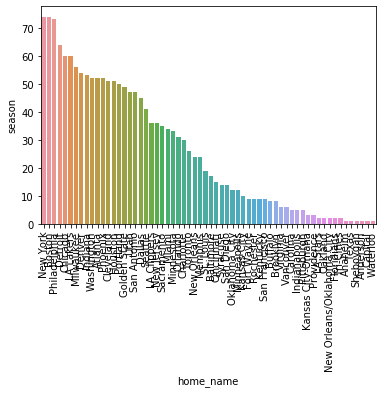

In [16]:
data = nba_simple_box.groupby(['home_name']).season.nunique().reset_index().sort_values(by = 'season', ascending = False)
sns.barplot(x = 'home_name',
            y = 'season',
            data = data)
plt.xticks(rotation = 90);

Look at average score scored by a team on the road

In [20]:
data = nba_simple_box.groupby('away_name')['away_score'].mean().sort_values(ascending = False)
data

away_name
Texas                        119.113636
Oakland                      118.406977
Cincinnati                   112.853659
San Francisco                112.035377
LA Stars                     111.811111
Virginia                     111.178439
Anaheim                      111.135135
Carolina                     111.121495
Floridians                   109.719101
Kentucky                     109.130120
San Diego                    108.410488
Kansas City                  106.698824
Pittsburgh                   106.500000
LA Lakers                    105.854559
Phoenix                      105.044375
Denver                       104.878390
Buffalo                      104.861446
Golden State                 104.549952
Oklahoma City                104.021113
Seattle                      103.219866
St. Louis                    102.960621
Houston                      102.520833
Boston                       102.472008
Portland                     102.338462
Brooklyn                     1

Look at average score scored by a team at home

In [16]:
nba_simple_box.groupby('home_name')['home_score'].mean().sort_values()

home_name
Providence       75.025000
Waterloo         79.645161
Indianapolis     80.342391
Tri-Cities       86.782609
Fort Wayne       87.000000
                   ...    
Cincinnati      115.408537
Floridians      116.696629
LA Stars        116.741573
Oakland         120.023256
Texas           122.466667
Name: home_score, Length: 62, dtype: float64

Look to see if we have any anomalies in away scores in the data set by using a histogram

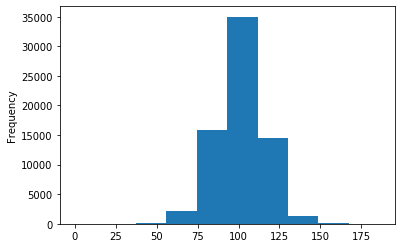

In [18]:
nba_simple_box['away_score'].plot.hist()

Look to see if we have any anomalies in home scores in the data set by using a histogram

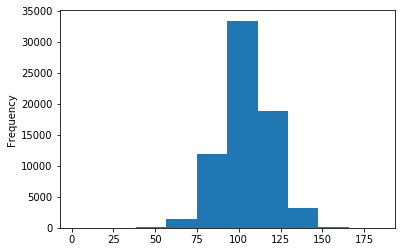

In [26]:
nba_simple_box['home_score'].plot.hist()

Remove password from memory

In [27]:
del mypasswd

Takeaway: The nba simple box scores do not contain any player data that could be useful in building our model. However, it is a pretty normal dataset, so if we need to work with it in the future, minimal work is needed to prepare it for usage.